In [1]:
pip install google_play_scraper

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import datetime as dt
import random
import time
from pprint import pprint

In [3]:
pd.read_csv('EMB_goo.csv')['at'].max()

'2022-10-27 18:10:20'

In [4]:
emb_users_reviews_goo = reviews_all(
                                'com.disney.emojimatch_goo',
                                sleep_milliseconds = 0,
                                lang = 'en',
                                country = 'us',
                                sort = Sort.NEWEST
)

In [5]:
emb_reviews_goo = pd.DataFrame(np.array(emb_users_reviews_goo),columns=['review'])
emb_reviews_goo = emb_reviews_goo.join(pd.DataFrame(emb_reviews_goo.pop('review').tolist()))
emb_reviews_goo.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,a1f89521-57c4-4412-9953-b275bc31876c,Jocelyn Sy,https://play-lh.googleusercontent.com/a/ALm5wu...,Fun,5,0,52.0.0,2022-10-27 18:10:20,None,NaT
1,a97d3c40-b96b-4d87-8599-eb9e749d2c00,crystal may,https://play-lh.googleusercontent.com/a/ALm5wu...,Awful. No matter the updates game randomly clo...,1,0,51.2.0,2022-10-27 12:17:07,"Hello Crystal, we have launched a new game ver...",2022-10-28 18:33:14
2,c4f8d81d-1455-45d8-b682-592cd86493ba,Coreter,https://play-lh.googleusercontent.com/a-/ACNPE...,It's really cool!,5,0,51.2.0,2022-10-27 07:07:17,None,NaT
3,1ea99c09-7a2a-4026-96d2-2fb5e49ddd72,Jordan Christie,https://play-lh.googleusercontent.com/a-/ACNPE...,I used to really love this game but have recen...,2,0,51.2.0,2022-10-26 15:11:40,"Hello Jordan, we have launched a new game vers...",2022-10-28 18:33:33
4,aa63511d-9be6-43d2-8faf-2506569eb3c4,Heather Nicole,https://play-lh.googleusercontent.com/a/ALm5wu...,I love this game but I don't know why it just ...,4,0,51.2.0,2022-10-26 03:42:00,"Thank you for your rating, Heather! Please che...",2022-10-27 18:31:50


In [6]:
emb_reviews_goo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100521 entries, 0 to 100520
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100521 non-null  object        
 1   userName              100521 non-null  object        
 2   userImage             100521 non-null  object        
 3   content               100521 non-null  object        
 4   score                 100521 non-null  int64         
 5   thumbsUpCount         100521 non-null  int64         
 6   reviewCreatedVersion  88893 non-null   object        
 7   at                    100521 non-null  datetime64[ns]
 8   replyContent          8212 non-null    object        
 9   repliedAt             8212 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 7.7+ MB


In [7]:
emb_reviews_goo['at'].describe()

/var/folders/7c/8ptk959x0m533j_8q9d72vn00000gn/T/ipykernel_58453/752791332.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  emb_reviews_goo['at'].describe()


count                  100521
unique                 100453
top       2020-07-01 18:39:33
freq                        2
first     2016-04-09 21:49:23
last      2022-10-27 18:10:20
Name: at, dtype: object

In [8]:
emb_reviews_goo.to_csv('EMB_goo.csv')

In [10]:
emb_review_content = pd.DataFrame(emb_reviews_goo, columns = ['content','score'])
emb_review_content

,content,score
0,Fun,5
1,Awful. No matter the updates game randomly clo...,1
2,It's really cool!,5
3,I used to really love this game but have recen...,2
4,I love this game but I don't know why it just ...,4
...,...,...
100516,So much fun,5
100517,Love it very addictive. Got my partner hooked ...,5
100518,Addictive,5
100519,It the best came,5


<AxesSubplot:ylabel='score'>

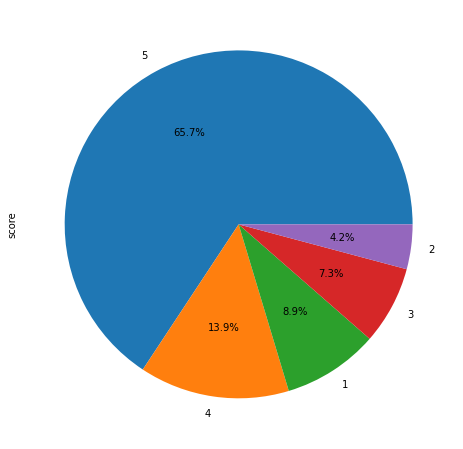

In [11]:
emb_review_content['score'].value_counts().plot(kind = 'pie', 
                                                figsize = (8,8),autopct = '%1.1f%%')

In [13]:
# Royal Match
rm_users_reviews_goo = reviews_all(
                                'com.dreamgames.royalmatch',
                                sleep_milliseconds = 0,
                                lang = 'en',
                                country = 'us',
                                sort = Sort.NEWEST
)
rm_reviews_goo = pd.DataFrame(np.array(rm_users_reviews_goo),columns=['review'])
rm_reviews_goo = rm_reviews_goo.join(pd.DataFrame(rm_reviews_goo.pop('review').tolist()))
rm_reviews_goo.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,47774322-9855-4222-a01d-a39aaf2329d4,Joseph c Bourne,https://play-lh.googleusercontent.com/a-/ACNPE...,it alright game,3,0,11098,2022-10-27 20:16:52,None,NaT
1,2dfc8eb8-de15-411c-9eec-8ab64e50a02a,Samantha Riffe,https://play-lh.googleusercontent.com/a-/ACNPE...,"so far, so good. no glitches and quick playing...",4,0,11098,2022-10-27 20:02:29,None,NaT
2,c1849221-a441-41c8-9224-f814bb6c1c36,Sara Sanders,https://play-lh.googleusercontent.com/a/ALm5wu...,fun,5,0,11098,2022-10-27 19:42:49,None,NaT
3,c2e9c54d-6ca9-48fb-8f63-9248193e7f95,Hydie Amoguis,https://play-lh.googleusercontent.com/a/ALm5wu...,💯👏👏👏👏🥰🥰🥰,3,0,11098,2022-10-27 19:34:25,None,NaT
4,f51c4dae-6368-41f8-9596-9f4781b6d4e6,Robert Barrett,https://play-lh.googleusercontent.com/a/ALm5wu...,What ever RAPIST created the Verizon app manag...,1,0,11098,2022-10-27 19:13:07,None,NaT


In [14]:
rm_reviews_goo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42881 entries, 0 to 42880
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              42881 non-null  object        
 1   userName              42881 non-null  object        
 2   userImage             42881 non-null  object        
 3   content               42881 non-null  object        
 4   score                 42881 non-null  int64         
 5   thumbsUpCount         42881 non-null  int64         
 6   reviewCreatedVersion  37341 non-null  object        
 7   at                    42881 non-null  datetime64[ns]
 8   replyContent          3422 non-null   object        
 9   repliedAt             3422 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 3.3+ MB


In [15]:
rm_reviews_goo['at'].describe()

/var/folders/7c/8ptk959x0m533j_8q9d72vn00000gn/T/ipykernel_58453/1032007996.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rm_reviews_goo['at'].describe()


count                   42881
unique                  42864
top       2022-02-01 23:46:26
freq                        2
first     2020-07-20 23:47:00
last      2022-10-27 20:16:52
Name: at, dtype: object

In [16]:
rm_reviews_goo.to_csv('Royal_Match_goo.csv')

<AxesSubplot:ylabel='score'>

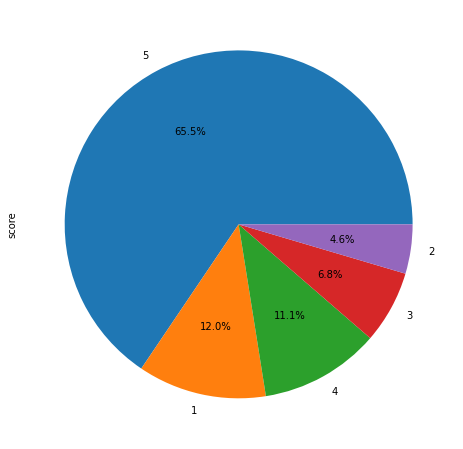

In [17]:
rm_review_content = pd.DataFrame(rm_reviews_goo, columns = ['content','score'])
rm_review_content['score'].value_counts().plot(kind = 'pie', 
                                                figsize = (8,8),autopct = '%1.1f%%')

In [12]:
from google_play_scraper import reviews
ccs_users_reviews_goo_20, _ = reviews(
                                'com.king.candycrushsaga',
                                lang = 'en',
                                country = 'us',
                                sort = Sort.NEWEST,
                                count = 200000
)

In [17]:
ccs_reviews_goo_20 = pd.DataFrame(np.array(ccs_users_reviews_goo_20),columns=['review'])
ccs_reviews_goo_20 = ccs_reviews_goo_20.join(pd.DataFrame(ccs_reviews_goo_20.pop('review').tolist()))
ccs_reviews_goo_20.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,5c70abeb-a39d-4aa4-a1f7-b5ff7009e98c,Jennifer Scott,https://play-lh.googleusercontent.com/a/ALm5wu...,Fantastic great mind blowin can't put it down,5,0,1.239.0.5,2022-11-11 10:06:35,None,None
1,2e01ff48-4cb7-463e-ac27-fb366974792a,Fahad Sarker,https://play-lh.googleusercontent.com/a/ALm5wu...,My experience is so awesome... Thanks for made...,5,0,1.239.0.5,2022-11-11 10:00:36,None,None
2,bf0f80ca-a20c-4e3d-85db-7312aa04bf85,Lewis Kalasa,https://play-lh.googleusercontent.com/a/ALm5wu...,🔥🔥🔥🔥🎉🎉🎉🇿🇲,5,0,1.239.0.5,2022-11-11 09:57:52,None,None
3,8322908a-3a25-428f-860c-31f4e2b956ff,Melhem Tabet,https://play-lh.googleusercontent.com/a/ALm5wu...,Love it,5,0,1.240.0.2,2022-11-11 09:57:52,None,None
4,0a90313b-e33d-411d-9019-f2b71508bc1a,"༄black ·H·O·L·E·,༒",https://play-lh.googleusercontent.com/a/ALm5wu...,It's is very nice game,4,0,1.237.0.3,2022-11-11 09:57:24,None,None


In [18]:
ccs_reviews_goo_20.to_csv('Candy_Crush_Saga_20w.csv')

In [ ]:
# from google_play_scraper import reviews
ccs_users_reviews_goo = reviews_all(
                                'com.king.candycrushsaga',
                                lang = 'en',
                                country = 'us',
                                sort = Sort.NEWEST)

In [ ]:
ccs_reviews_goo.info()

In [ ]:
ccs_reviews_goo['at'].describe()

In [ ]:
ccs_reviews_goo.to_csv('Candy Crush Saga.csv')

In [ ]:
ccs_review_content = pd.DataFrame(ccs_reviews_goo, columns = ['content','score'])
ccs_review_content['score'].value_counts().plot(kind = 'pie', 
                                                figsize = (8,8),autopct = '%1.1f%%')